<a href="https://colab.research.google.com/github/CarlosRochaCx/MNA/blob/main/MNA_IAyAA_Actividad_Pronosticos_Series_de_Tiempo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Inteligencia Artificial y Aprendizaje Automático**
## **Maestría en Inteligencia Artificial Aplicada**
### **Dr Luis Eduardo Falcón Morales**
### **Tecnológico de Monterrey**
## **Actividad Individual Semana 9: Pronósticos con Series de Tiempo**


#### **Nombre:** Carlos Alberto Rocha Chávez
#### **Matrícula:** A01796914

Modelos para predicción de un problema de serie de tiempo:

* **1. Modelo ingenuo**
* **2. Modelo ARIMA**
* **3. Modelo Prophet**
* **4. Modelo LSTM**

In [15]:
## ++++++++++ Incluye todas las celdas y líneas de código que requieras +++++++++++++++++++++++++

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MNA - Maestría en Inteligencia Artificial Aplicada/Inteligencia Artificial y Aprendizaje Automático/Tareas/Actividad Semana 9/monthly_champagne_sales.csv")

df.head().T

,0,1,2,3,4
Month,1964-01,1964-02,1964-03,1964-04,1964-05
Sales,2815,2672,2755,2721,2946


In [25]:
df.shape

(105, 2)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   105 non-null    object
 1   Sales   105 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


In [26]:
# Asegurarse de que la columna Month sea datetime
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# División: Entrenamiento (hasta 12 meses antes del final) y prueba
train = df[:-12]
test = df[-12:]

Modelo Ingenuo (Naive Forecast)

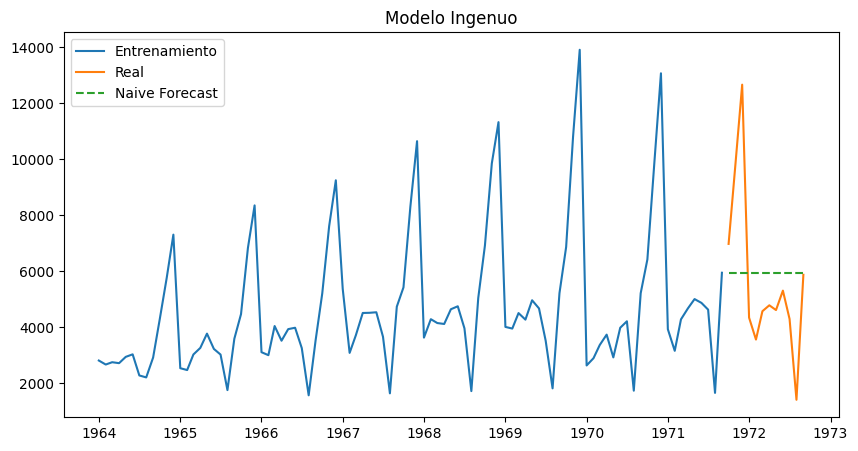

In [27]:
# Último valor del entrenamiento
last_value = train['Sales'].iloc[-1]

# Pronóstico para cada mes del test
naive_forecast = np.repeat(last_value, len(test))

# Visualizar
plt.figure(figsize=(10, 5))
plt.plot(train['Sales'], label='Entrenamiento')
plt.plot(test.index, test['Sales'], label='Real')
plt.plot(test.index, naive_forecast, label='Naive Forecast', linestyle='--')
plt.title("Modelo Ingenuo")
plt.legend()
plt.show()

Modelo ARIMA

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


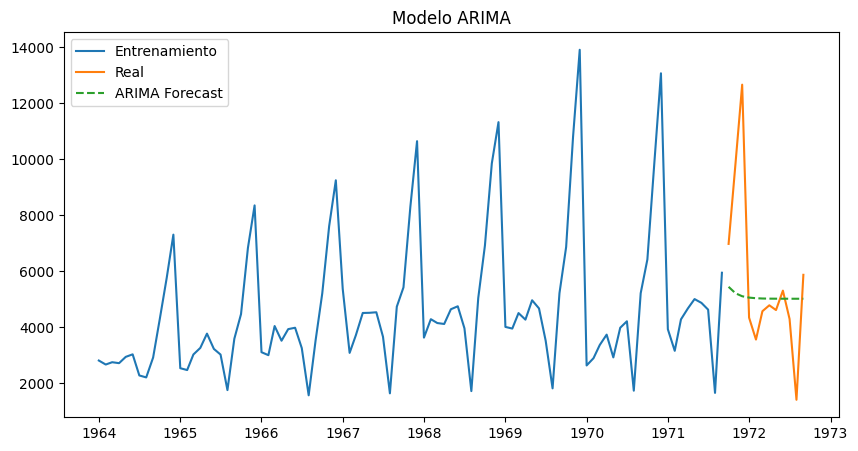

In [28]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error

# Entrenamiento del modelo ARIMA (se puede ajustar el orden según AIC/BIC o pruebas ADF)
arima_model = ARIMA(train['Sales'], order=(1,1,1))  # p=1, d=1, q=1 como ejemplo inicial
arima_result = arima_model.fit()

# Pronóstico
arima_forecast = arima_result.forecast(steps=12)

# Visualizar
plt.figure(figsize=(10, 5))
plt.plot(train['Sales'], label='Entrenamiento')
plt.plot(test['Sales'], label='Real')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast', linestyle='--')
plt.title("Modelo ARIMA")
plt.legend()
plt.show()

Modelo Prophet

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpctjzq5yy/0dyn9y58.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpctjzq5yy/7x5noogx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76108', 'data', 'file=/tmp/tmpctjzq5yy/0dyn9y58.json', 'init=/tmp/tmpctjzq5yy/7x5noogx.json', 'output', 'file=/tmp/tmpctjzq5yy/prophet_modelh7s2s2i9/prophet_model-20250617021235.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
02:12:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
02:12:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


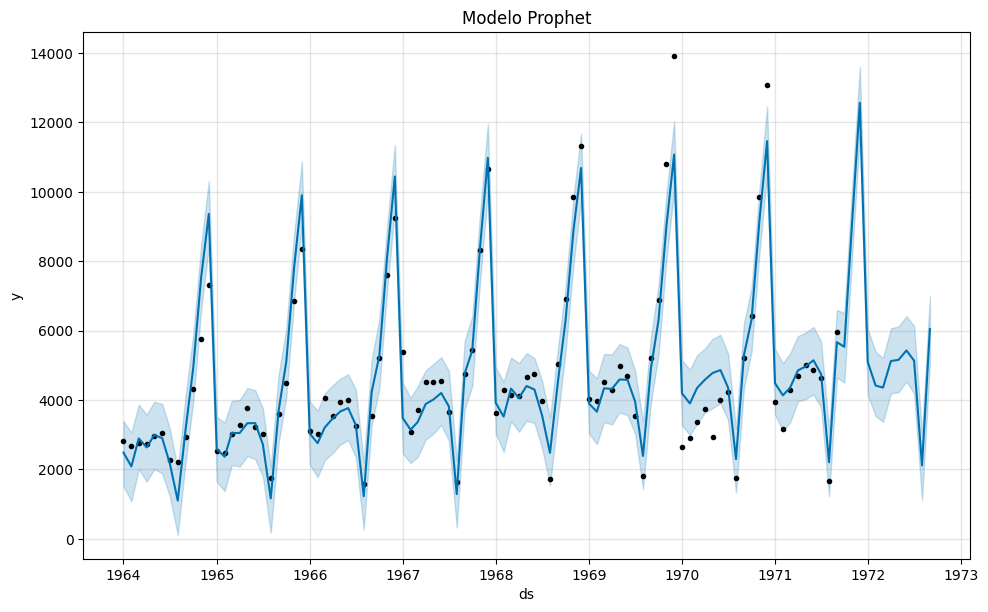

In [29]:
from prophet import Prophet

# Convertir para Prophet
df_prophet = df.reset_index().rename(columns={'Month': 'ds', 'Sales': 'y'})

# Separar entrenamiento y prueba
train_prophet = df_prophet[:-12]
test_prophet = df_prophet[-12:]

# Crear y ajustar el modelo
prophet = Prophet()
prophet.fit(train_prophet)

# Crear futuro (12 meses)
future = prophet.make_future_dataframe(periods=12, freq='M')
forecast = prophet.predict(future)

# Visualizar
prophet.plot(forecast)
plt.title("Modelo Prophet")
plt.show()

Modelo LSTM

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step


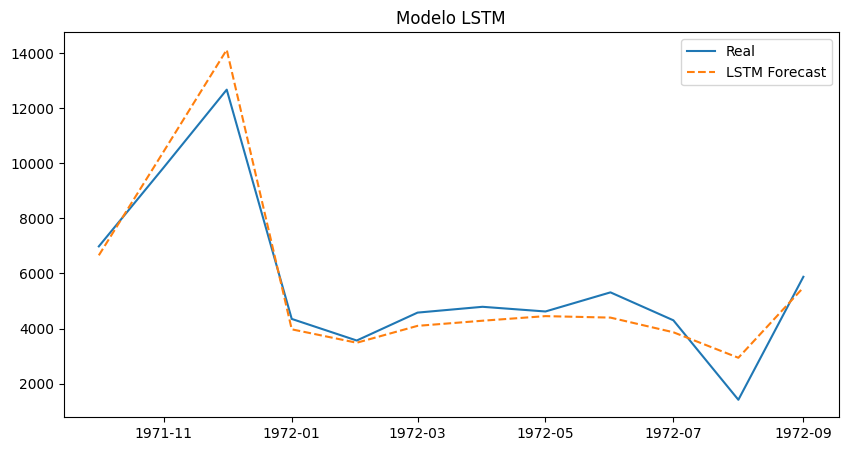

In [30]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Escalado
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Sales']])

# Crear secuencias para LSTM
def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i+n_steps])
        y.append(data[i+n_steps])
    return np.array(X), np.array(y)

n_steps = 12
X, y = create_sequences(scaled_data, n_steps)

# Separar entrenamiento y prueba
X_train, y_train = X[:-12], y[:-12]
X_test, y_test = X[-12:], y[-12:]

# LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(n_steps, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=200, verbose=0)

# Pronóstico
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)

# Visualizar
plt.figure(figsize=(10, 5))
plt.plot(df.index[-12:], test['Sales'], label='Real')
plt.plot(df.index[-12:], y_pred, label='LSTM Forecast', linestyle='--')
plt.title("Modelo LSTM")
plt.legend()
plt.show()

## **<<< Fin de la Actividad de la Semana - Pronósticos y Series de Tiempo >>>**